<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E3%82%B9%E3%83%83%E3%82%AD%E3%83%AA%E6%A9%9F%E6%A2%B0%E7%AC%AC14%E7%AB%A0%E7%B7%B4%E7%BF%92%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
df = pd.read_csv('/content/cinema.csv') # csvの読み込み


df = df.drop(['cinema_id'], axis = 1) # 不要な列を削除

df = df.fillna(df.mean( )) # 列ごとの平均値で欠損値の穴埋め


from sklearn.preprocessing import StandardScaler
# 中身が整数だと、fit_transformで警告になるので、そこは注意する
# 標準化
sc = StandardScaler()
sc_df = sc.fit_transform(df)

sc_df = pd.DataFrame(sc_df, columns = df.columns)

df.head()

,SNS1,SNS2,actor,original,sales
0,291.0,1044,8808.994029,0,9731
1,363.0,568,10290.709370,1,10210
2,158.0,431,6340.388534,1,8227
3,261.0,578,8250.485081,0,9658
4,209.0,683,10908.539550,0,9286


In [15]:
from sklearn.decomposition import PCA

# モデル作成
model = PCA(whiten = True)

model.fit(sc_df)

# 学習と新規軸へのデータの当てはめを一括で行う
tmp = model.fit_transform(sc_df)
tmp.shape

(100, 5)

In [11]:
model.explained_variance_ratio_ # 寄与率

array([0.54012068, 0.1860554 , 0.13631136, 0.10527073, 0.03224184])

<Axes: >

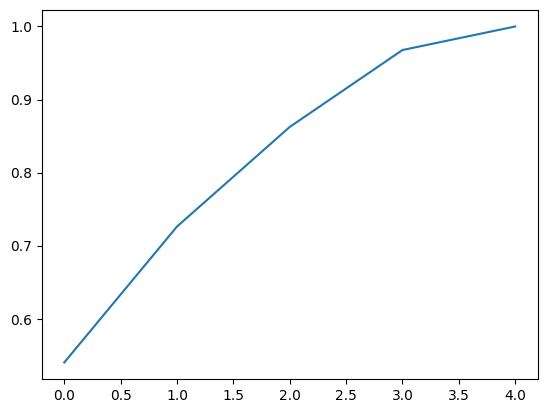

In [12]:
ratio = model.explained_variance_ratio_ # 寄与率のデータ集合

array = [] # 第N列までの累積寄与率を格納するリスト
for i in range(len(ratio)):
# 累積寄与率の計算
    ruiseki = sum(ratio[0:(i+1)])

    array.append(ruiseki) # 累積寄与率の格納

# 第N列の累積寄与率を折れ線グラフ化
pd.Series(array).plot(kind = 'line')

In [16]:
thred = 0.85 # 累積寄与率のしきい値
for i in range(len(array)):
 # 第(i + 1)列の累積寄与率がthredより大きいかチェック
    if array[i] >= thred:
        print(i + 1)
        break

3


In [19]:
model = PCA(n_components=3, whiten = True)
model.fit (sc_df) # 学習

# 標準化済の既存データ（numpy)をデータフレーム化

new = pd.DataFrame(model.transform(sc_df), columns = ['pc1', 'pc2','pc3'])


# 2つのデータフレームを列方向に結合
new_df = pd.concat([new,sc_df], axis=1)

cor_df = new_df.corr() # 相関係数の計算
cor_df.loc['pc1':'pc3', 'SNS1':]

,SNS1,SNS2,actor,original,sales
pc1,0.736368,0.598555,0.837999,0.469117,0.936901
pc2,-0.050756,-0.534089,-0.037073,0.800559,0.013415
pc3,-0.531509,0.536704,-0.017275,0.324773,-0.072303
